In [1]:
import turicreate as tc

In [2]:
data = tc.SFrame("./home_data.sframe/")

In [3]:
data.head(5)

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 5

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 7129300520 | 2014-10-13 00:00:00+00:00 | 221900.0 |   3.0    |    1.0    |
| 6414100192 | 2014-12-09 00:00:00+00:00 | 538000.0 |   3.0    |    2.25   |
| 5631500400 | 2015-02-25 00:00:00+00:00 | 180000.0 |   2.0    |    1.0    |
| 2487200875 | 2014-12-09 00:00:00+00:00 | 604000.0 |   4.0    |    3.0    |
| 1954400510 | 2015-02-18 00:00:00+00:00 | 510000.0 |   3.0    |    2.0    |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    1180.0   |  5650.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    2570.0   |  7242.0  |  2.0   |     0      |  0   |     3     |  7.0  |
|    770.0    | 10000.0  |  1.0   |     0      |  0   |     3     |  6.0  |
|    1960.0   |  5000.0  |  1.0   |     0      |  0   |     5     |  7.0  |
|    1680.0   |  8080.0  |  1.0   |     0      |  0   |     3     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1180.0   |      0.0      |  1955.0  |     0.0      |  98178  | 47.51123398 |
|   2170.0   |     400.0     |  1951.0  |    1991.0    |  98125  | 47.72102274 |
|   770.0    |      0.0      |  1933.0  |     0.0      |  98028  | 47.73792661 |
|   1050.0   |     910.0     |  1965.0  |     0.0      |  98136  |   47.52082  |
|   1680.0   |      0.0      |  1987.0  |     0.0      |  98074  | 47.61681228 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.25677536 |     1340.0    | ... |
|  -122.3188624 |     1690.0    | ... |
| -122.23319601 |     2720.0    | ... |
| -122.39318505 |     1360.0    | ... |
| -122.04490059 |     1800.0    | ... |
+---------------+---------------+-----+
[5 rows x 21 columns]

In [4]:
data.shape

(21613, 21)

In [5]:
data.column_names

<bound method SFrame.column_names of Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 21613

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 7129300520 | 2014-10-13 00:00:00+00:00 |  221900.0 |   3.0    |    1.0    |
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000.0 |   3.0    |    2.25   |
| 5631500400 | 2015-02-25 00:00:00+00:00 |  180000.0 |   2.0    |    1.0    |
| 2487200875 | 2014-12-09 00:00:00+00:00 |  604000.0 |   4.0    |    3.0    |
| 1954400510 | 2015-02-18 00:00:00+00:00 |  510000.0 |   3.0    | 

In [6]:
tc.show(data[1:5000]['sqft_living'],data[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

In [7]:
train_data , test_data = data.random_split(0.8,seed=2)

In [8]:
linear_model = tc.linear_regression.create(train_data,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16404

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.026867     | 4360756.345048     | 1334919.416725       | 263402.359119                   | 234936.203026                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [9]:
print("Mean of House price : %s"%str(test_data['price'].mean()))

Mean of House price : 542544.3088607595


In [10]:
linear_model.evaluate(train_data)

{'max_error': 4360756.3450483885, 'rmse': 262051.5611869314}

In [12]:
#!pip install matplotlib

     |████████████████████████████████| 12.4 MB 413 kB/s eta 0:00:01    |██▍                             | 911 kB 155 kB/s eta 0:01:14     |█████████████████████           | 8.1 MB 840 kB/s eta 0:00:06     |█████████████████████▊          | 8.4 MB 840 kB/s eta 0:00:05     |██████████████████████▋         | 8.8 MB 724 kB/s eta 0:00:06     |█████████████████████████████▎  | 11.4 MB 727 kB/s eta 0:00:02
     |████████████████████████████████| 88 kB 248 kB/s eta 0:00:01


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

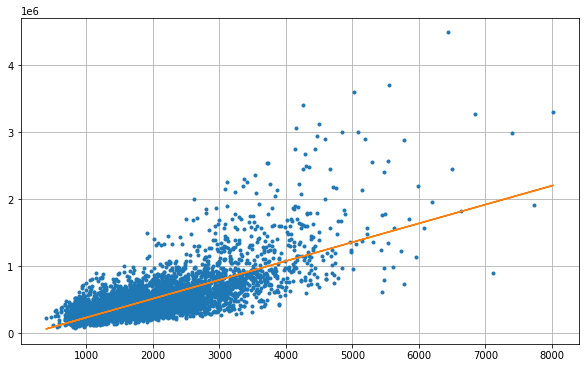

In [12]:
plt.figure(figsize=(10,6))
plt.plot(test_data['sqft_living'],test_data['price'],'.')
plt.plot(test_data['sqft_living'],linear_model.predict(test_data),'-')
plt.grid(True)

In [13]:
linear_model.coefficients

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 2

Data:
+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None | -45595.85996127012 | 5086.070332853865 |
| sqft_living |  None | 280.89954480604825 | 2.231822917346684 |
+-------------+-------+--------------------+-------------------+
[2 rows x 4 columns]

In [14]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [15]:
data[my_features].show()

Materializing SFrame

In [16]:
tc.show(data['zipcode'],data['price'])

Materializing X axis SArray

Materializing Y axis SArray

In [17]:
linear_model_2 = tc.linear_regression.create(train_data,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16404

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.349339     | 4133936.644585     | 1925813.350965       | 189316.540847                   | 170131.439710                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [18]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [19]:
print("Bill Gates house Details : ",bill_gates)

Bill Gates house Details :  {'bedrooms': [8], 'bathrooms': [25], 'sqft_living': [50000], 'sqft_lot': [225000], 'floors': [4], 'zipcode': ['98039'], 'condition': [10], 'grade': [10], 'waterfront': [1], 'view': [4], 'sqft_above': [37500], 'sqft_basement': [12500], 'yr_built': [1994], 'yr_renovated': [2010], 'lat': [47.627606], 'long': [-122.242054], 'sqft_living15': [5000], 'sqft_lot15': [40000]}


In [25]:
#Predict Bill gates house price for 2nd linear model 
#pic of Bill gates House

<img src="https://image.cnbcfm.com/api/v1/image/105841065-1554818009865gettyimages-626759612.jpg?v=1561392118">

In [30]:
print("Price of bill gates' house is : $%d"%(int(linear_model_2.predict(tc.SFrame(bill_gates))[0])))

Price of bill gates' house is : $14858652


In [35]:
data[data['zipcode'] == '98039']['price'].mean()

2160606.5999999996

In [52]:
a = data[data['sqft_living']>=2000]

In [57]:
a[a['sqft_living']<=4000].shape

(9221, 21)

In [58]:
9221 / data.shape[0]

0.4266413732475825

In [59]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [60]:
advance_model = tc.linear_regression.create(train_data,target='price',features=advanced_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16404

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.084499     | 4371058.915698     | 1174071.074151       | 162946.121285                   | 143844.284789                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [61]:
advance_model.evaluate(train_data)

{'max_error': 4371058.915698299, 'rmse': 162043.88853101406}

In [62]:
linear_model_2.evaluate(train_data)

{'max_error': 4133936.644585027, 'rmse': 188403.0539367459}

In [63]:
188403.0539367459  - 162043.88853101406

26359.165405731852